In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('marketing_data.csv')

In [216]:
df.head(3)

,Id,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Mntwines,Mntfruits,...,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,AgeGroup
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,False,False,False,False,False,False,False,True,False,51-60
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,False,False,True,False,False,False,False,False,False,61-70
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,False,False,False,False,False,False,False,False,True,61-70


In [28]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Mntwines', 'Mntfruits',
       'Mntmeatproducts', 'Mntfishproducts', 'Mntsweetproducts',
       'Mntgoldprods', 'Numdealspurchases', 'Numwebpurchases',
       'Numcatalogpurchases', 'Numstorepurchases', 'Numwebvisitsmonth',
       'Acceptedcmp3', 'Acceptedcmp4', 'Acceptedcmp5', 'Acceptedcmp1',
       'Acceptedcmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\singh\AppData\Local\Temp\ipykernel_11960\177162232.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [26]:
df.columns = df.columns.str.strip()       # remove spaces
df.columns = df.columns.str.replace(' ', '_')  # replace spaces with underscores
df.columns = df.columns.str.title()       # make first letter uppercase

In [32]:
df['Income'] = df['Income'].replace('[\$,]', '', regex=True)
df['Income'] = df['Income'].astype(float)
print(df.dtypes)

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Mntwines                        int64
Mntfruits                       int64
Mntmeatproducts                 int64
Mntfishproducts                 int64
Mntsweetproducts                int64
Mntgoldprods                    int64
Numdealspurchases               int64
Numwebpurchases                 int64
Numcatalogpurchases             int64
Numstorepurchases               int64
Numwebvisitsmonth               int64
Acceptedcmp3                    int64
Acceptedcmp4                    int64
Acceptedcmp5                    int64
Acceptedcmp1                    int64
Acceptedcmp2                    int64
Response                        int64
Complain    

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\singh\AppData\Local\Temp\ipykernel_11960\1429930962.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace('[\$,]', '', regex=True)


## Income values for a few customers are missing. Perform missing value
imputation. Assume that the customers with similar education and marital status
make the same yearly income, on average. You may have to clean the data
before performing this. For data cleaning, look into the categories of education
and marital status.

In [39]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.mean())
)

In [43]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Mntwines               0
Mntfruits              0
Mntmeatproducts        0
Mntfishproducts        0
Mntsweetproducts       0
Mntgoldprods           0
Numdealspurchases      0
Numwebpurchases        0
Numcatalogpurchases    0
Numstorepurchases      0
Numwebvisitsmonth      0
Acceptedcmp3           0
Acceptedcmp4           0
Acceptedcmp5           0
Acceptedcmp1           0
Acceptedcmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Total Children

In [51]:
df['Total Children'] = df['Kidhome']+df['Teenhome']

In [47]:
df['Total Children']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Total Children, Length: 2240, dtype: int64

## Age

In [57]:
current_year=2025
df['Age'] = current_year - df['Year_Birth']

In [59]:
df['Age']

0       55
1       64
2       67
3       58
4       36
        ..
2235    49
2236    48
2237    49
2238    47
2239    56
Name: Age, Length: 2240, dtype: int64

## Total Spending

In [66]:
mnt_columns = [col for col in df.columns if col.startswith('Mnt')]
print(mnt_columns)

['Mntwines', 'Mntfruits', 'Mntmeatproducts', 'Mntfishproducts', 'Mntsweetproducts', 'Mntgoldprods']


In [72]:
df['Total_spending'] = df[mnt_columns].sum(axis=1)

### Create box plots and histograms to understand the distributions and outliers and Perform outlier treatment.

In [79]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'Mntwines', 'Mntfruits', 'Mntmeatproducts', 'Mntfishproducts',
       'Mntsweetproducts', 'Mntgoldprods', 'Numdealspurchases',
       'Numwebpurchases', 'Numcatalogpurchases', 'Numstorepurchases',
       'Numwebvisitsmonth', 'Acceptedcmp3', 'Acceptedcmp4', 'Acceptedcmp5',
       'Acceptedcmp1', 'Acceptedcmp2', 'Response', 'Complain',
       'Total Children', 'Age', 'Total_spending'],
      dtype='object')


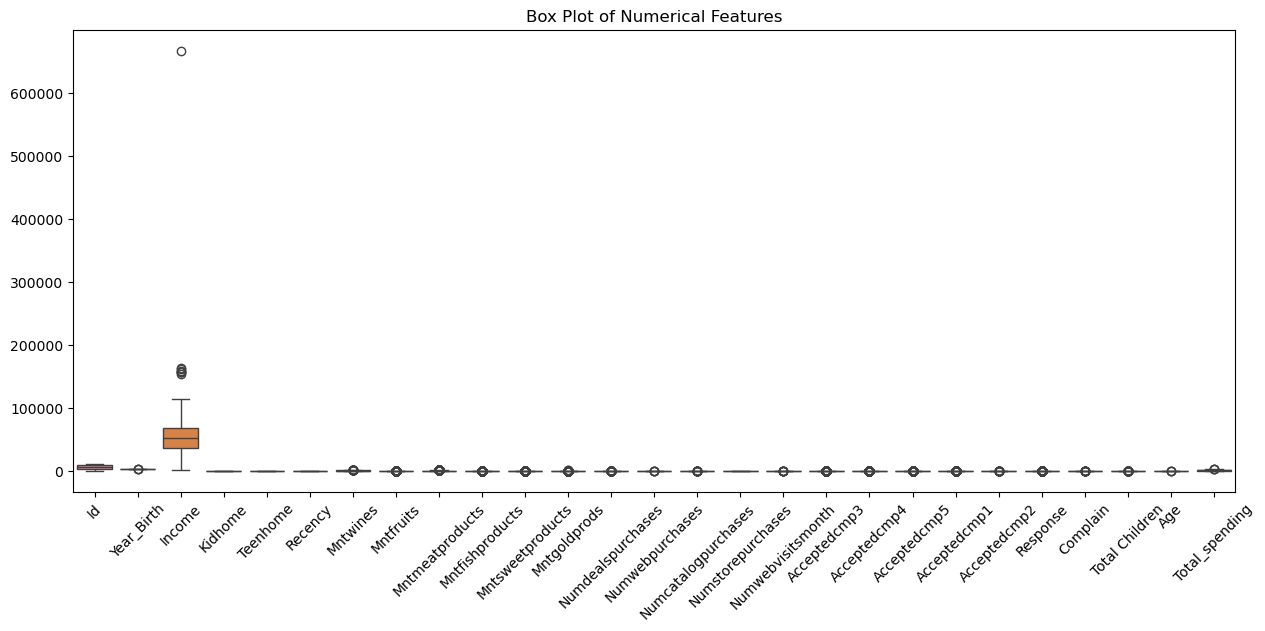

In [81]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_cols])
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

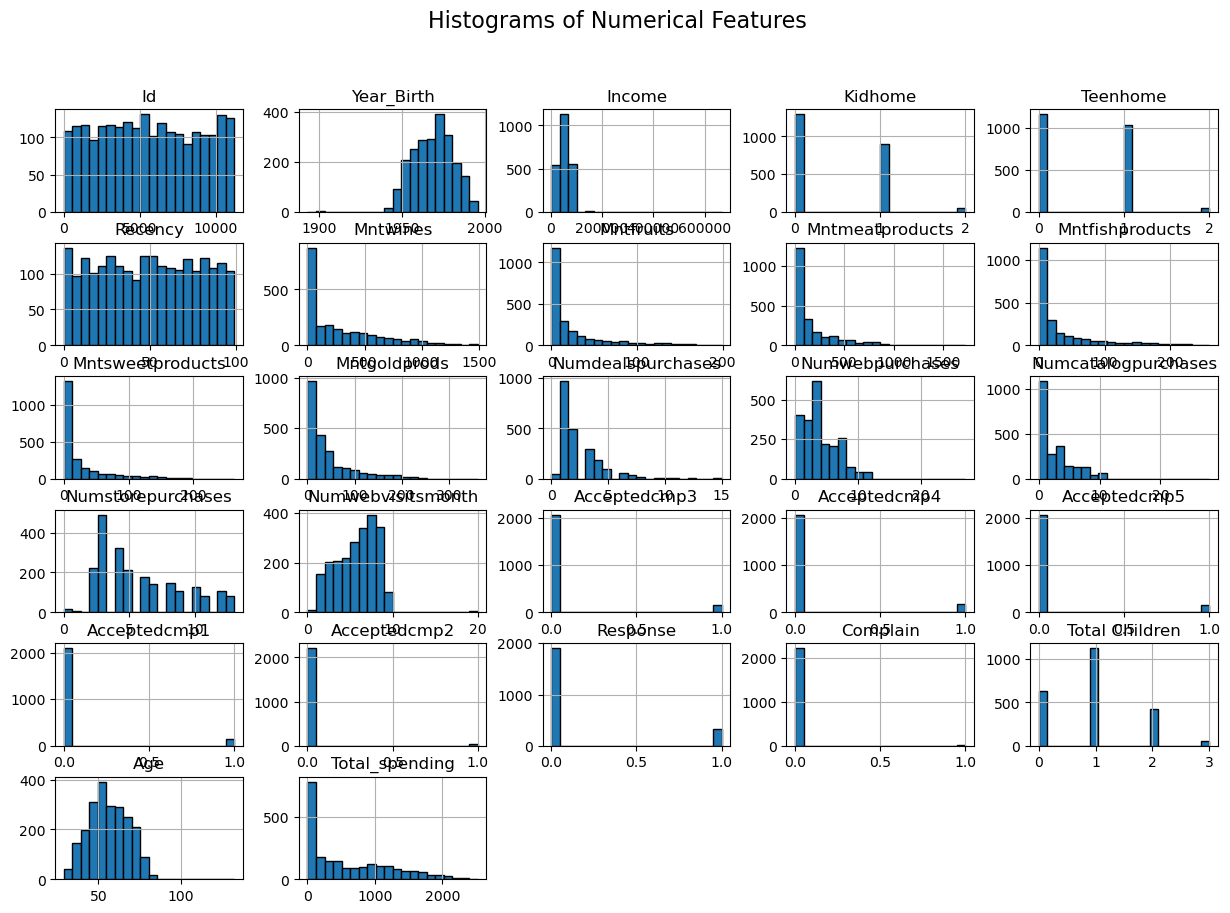

In [83]:
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", size=16)
plt.show()

In [87]:
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower, upper)
    return data

In [89]:
df_clean = remove_outliers_iqr(df.copy(), num_cols)

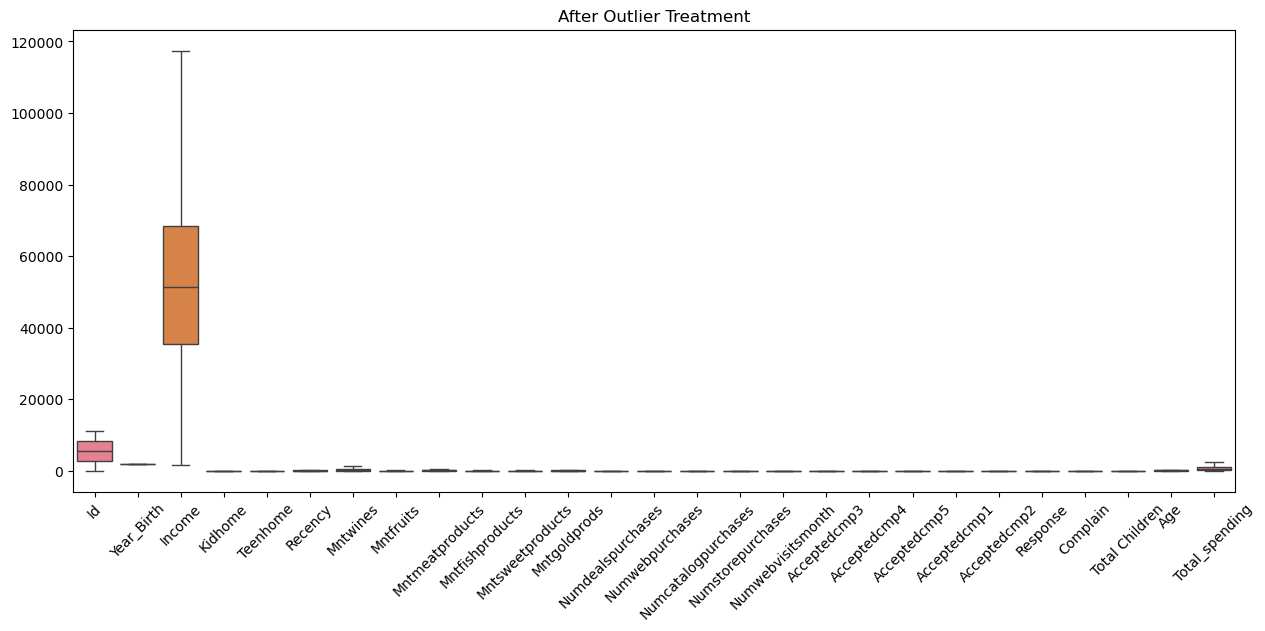

In [91]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_clean[num_cols])
plt.title("After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

### Use ordinal encoding and one hot encoding according to different types of categorical variables.

#### ordinal encoding 

In [95]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Education', 'Marital_Status', 'Country'], dtype='object')


In [107]:
print(df['Education'].unique())

['Graduation' 'Phd' '2N Cycle' 'Master' 'Basic']


In [123]:
df['Education'] = df['Education'].str.strip()        
df['Education'] = df['Education'].str.title() 

In [125]:
edu_order = [['Basic', '2N Cycle', 'Graduation', 'Master', 'Phd']]

In [127]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=edu_order)
df['Education_encoded'] = encoder.fit_transform(df[['Education']])

#### one hot encoding

In [135]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True)

In [137]:
df.head(3)

,Id,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Mntwines,Mntfruits,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,False,False,False,False,False,False,False,False,True,False
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,False,False,False,True,False,False,False,False,False,False
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,False,False,False,False,False,False,False,False,False,True


### Create a heatmap to showcase the correlation between different pairs of variables.

In [140]:
corr = df.select_dtypes(include=['number']).corr()

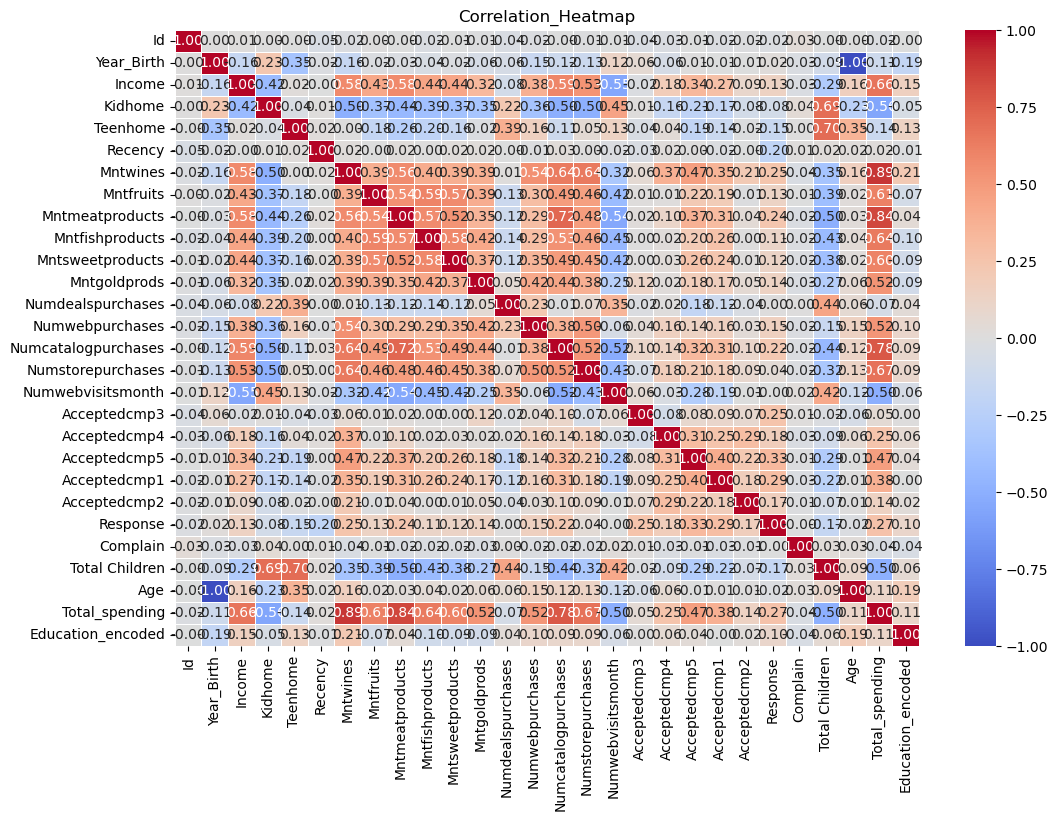

In [144]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation_Heatmap")
plt.show()

### Test the following hypotheses:
o Older people are not as tech-savvy and probably prefer shopping in-store.
o Customers with kids probably have less time to visit a store and would prefer
to shop online.
o Other distribution channels may cannibalize sales at the store.
o Does the US fare significantly better than the rest of the world in terms of total
purchases?

In [163]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Mntwines', 'Mntfruits', 'Mntmeatproducts',
       'Mntfishproducts', 'Mntsweetproducts', 'Mntgoldprods',
       'Numdealspurchases', 'Numwebpurchases', 'Numcatalogpurchases',
       'Numstorepurchases', 'Numwebvisitsmonth', 'Acceptedcmp3',
       'Acceptedcmp4', 'Acceptedcmp5', 'Acceptedcmp1', 'Acceptedcmp2',
       'Response', 'Complain', 'Total Children', 'Age', 'Total_spending',
       'Education_encoded', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_CA', 'Country_GER', 'Country_IND',
       'Country_ME', 'Country_SA', 'Country_SP', 'Country_US'],
      dtype='object')

In [157]:
from scipy.stats import pearsonr

# Correlation between age and online purchases
r_web, p_web = pearsonr(df['Age'], df['Numwebpurchases'])

# Correlation between age and in-store purchases
r_store, p_store = pearsonr(df['Age'], df['Numwebpurchases'])

print("Age vs Web Purchases → r =", round(r_web, 3), ", p =", round(p_web, 4))
print("Age vs Store Purchases → r =", round(r_store, 3), ", p =", round(p_store, 4))

Age vs Web Purchases → r = 0.145 , p = 0.0
Age vs Store Purchases → r = 0.145 , p = 0.0


In [165]:
r_web_kids, p_web_kids = pearsonr(df['Total Children'], df['Numwebpurchases'])
r_store_kids, p_store_kids = pearsonr(df['Total Children'], df['Numstorepurchases'])

print("Children vs Web Purchases → r =", round(r_web_kids, 3), ", p =", round(p_web_kids, 4))
print("Children vs Store Purchases → r =", round(r_store_kids, 3), ", p =", round(p_store_kids, 4))

Children vs Web Purchases → r = -0.146 , p = 0.0
Children vs Store Purchases → r = -0.321 , p = 0.0


                     Numstorepurchases  Numwebpurchases  Numcatalogpurchases
Numstorepurchases             1.000000         0.502713             0.518738
Numwebpurchases               0.502713         1.000000             0.378376
Numcatalogpurchases           0.518738         0.378376             1.000000


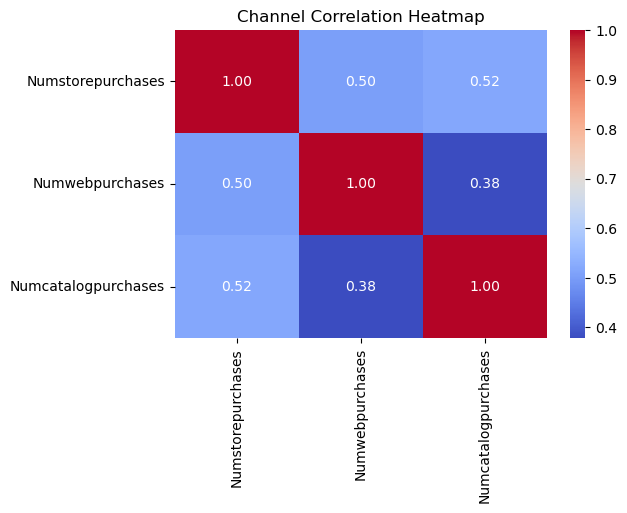

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

channel_corr = df[['Numstorepurchases', 'Numwebpurchases', 'Numcatalogpurchases']].corr()
print(channel_corr)

plt.figure(figsize=(6,4))
sns.heatmap(channel_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Channel Correlation Heatmap")
plt.show()

In [173]:
print(df.columns.tolist())

['Id', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Mntwines', 'Mntfruits', 'Mntmeatproducts', 'Mntfishproducts', 'Mntsweetproducts', 'Mntgoldprods', 'Numdealspurchases', 'Numwebpurchases', 'Numcatalogpurchases', 'Numstorepurchases', 'Numwebvisitsmonth', 'Acceptedcmp3', 'Acceptedcmp4', 'Acceptedcmp5', 'Acceptedcmp1', 'Acceptedcmp2', 'Response', 'Complain', 'Total Children', 'Age', 'Total_spending', 'Education_encoded', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']


In [181]:
from scipy.stats import ttest_ind

us = df[df['Country_US']]['Total_spending']
non_us = df[df['Country_US'] != 'US']['Total_spending']

t_stat, p_val = ttest_ind(us, non_us, equal_var=False)
print("T-statistic:", round(t_stat, 3), "P-value:", round(p_val, 4))
print("Mean (US):", us.mean(), " | Mean (Non-US):", non_us.mean())

T-statistic: 0.309 P-value: 0.7579
Mean (US): 622.7706422018349  | Mean (Non-US): 605.7982142857143


#### Use appropriate visualization to help analyze the following:
o Which products are performing the best, and which are performing the least in
terms of revenue?
o Is there any pattern between the age of customers and the last campaign
acceptance rate?
o Which Country has the greatest number of customers who accepted the last
campaign?
o Do you see any pattern in the no. of children at home and total spend?
o Education background of the customers who complained in the last 2 years.

#### Which products are performing the best, and which are performing the least in terms of revenue?

In [189]:
product_cols = ['Mntwines', 'Mntfruits', 'Mntmeatproducts',
                'Mntfishproducts', 'Mntsweetproducts', 'Mntgoldprods']

In [191]:
product_revenue = df[product_cols].sum().sort_values(ascending=False)
print(product_revenue)

Mntwines            680816
Mntmeatproducts     373968
Mntgoldprods         98609
Mntfishproducts      84057
Mntsweetproducts     60621
Mntfruits            58917
dtype: int64


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\4124273499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')


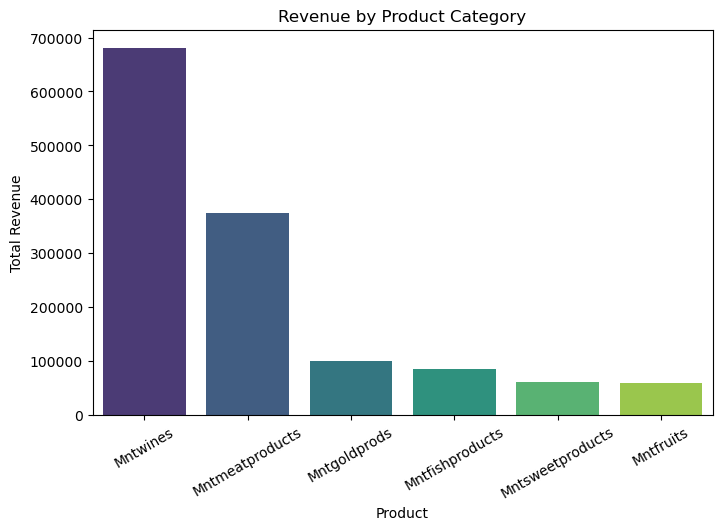

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=30)
plt.show()

### Conlusion - Mntwines is performing best and Mntfruits performing least.

## Is there any pattern between the age of customers and the last campaign acceptance rate?

C:\Users\singh\AppData\Local\Temp\ipykernel_11960\1918285960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Age', data=df, palette='coolwarm')


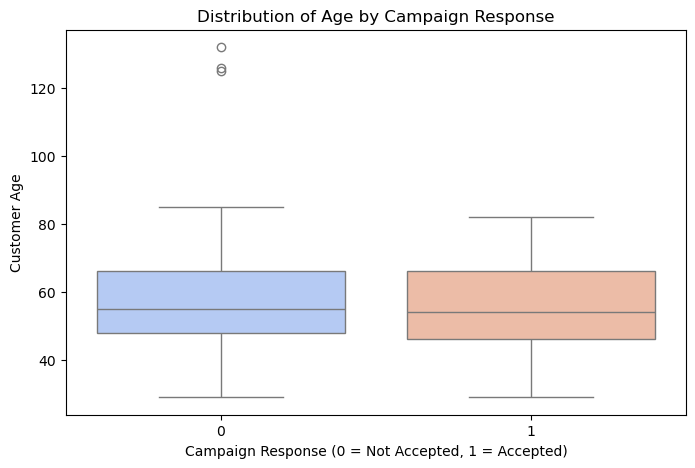

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Age', data=df, palette='coolwarm')
plt.title('Distribution of Age by Campaign Response')
plt.xlabel('Campaign Response (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Customer Age')
plt.show()

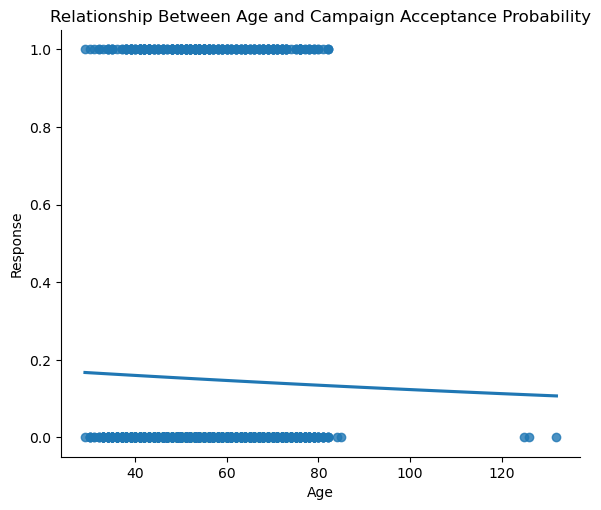

In [201]:
sns.lmplot(x='Age', y='Response', data=df, logistic=True, ci=None, height=5, aspect=1.2)
plt.title('Relationship Between Age and Campaign Acceptance Probability')
plt.show()

In [203]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[18, 30, 40, 50, 60, 70, 100],
                        labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

acceptance_by_age = df.groupby('AgeGroup')['Response'].mean()
print(acceptance_by_age)

AgeGroup
18-30    0.285714
31-40    0.158879
41-50    0.150808
51-60    0.149408
61-70    0.134904
70+      0.158228
Name: Response, dtype: float64


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\3689536599.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_by_age = df.groupby('AgeGroup')['Response'].mean()


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\2216189973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_age.index, y=acceptance_by_age.values, palette='mako')


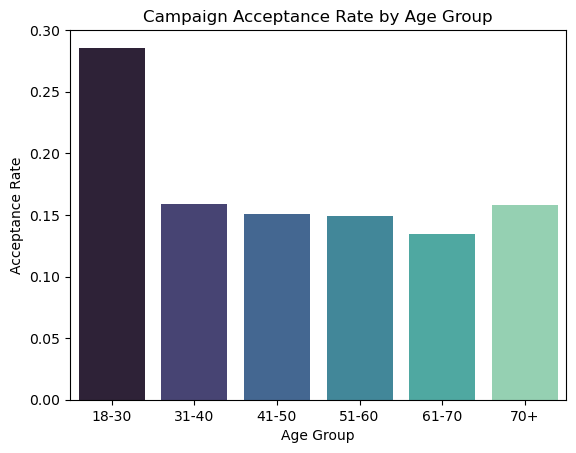

In [205]:
sns.barplot(x=acceptance_by_age.index, y=acceptance_by_age.values, palette='mako')
plt.title('Campaign Acceptance Rate by Age Group')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Group')
plt.show()

In [207]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['Age'], df['Response'])
print(f"Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Correlation: -0.021, p-value: 0.313


### Conclusion - Acceptance rate tends to decline with age. Younger segments respond better , More open to digital offers or online campaigns

## Which Country has the greatest number of customers who accepted the last campaign?

In [218]:
# List of one-hot encoded country columns
country_cols = [col for col in df.columns if col.startswith('Country_')]

# For each country column, sum accepted customers
accepted_by_country = {}
for col in country_cols:
    country_name = col.replace('Country_', '')
    accepted_by_country[country_name] = df.loc[df['Response'] == 1, col].sum()

# Convert to Series and sort
import pandas as pd
accepted_by_country = pd.Series(accepted_by_country).sort_values(ascending=False)
print(accepted_by_country)

SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\281284012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accepted_by_country.index, y=accepted_by_country.values, palette='coolwarm')


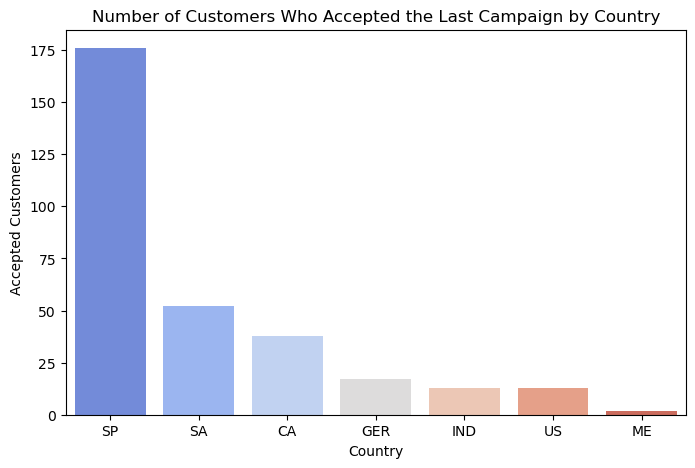

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=accepted_by_country.index, y=accepted_by_country.values, palette='coolwarm')
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Accepted Customers')
plt.show()

### Conlusion - SP Country has most of customers

In [223]:
df[['Total Children', 'Total_spending']].groupby('Total Children').mean()

,Total_spending
Total Children,
0,1106.029781
1,472.733156
2,245.947743
3,274.603774


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\1687020112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Children', y='Total_spending', data=df, estimator='mean', palette='viridis')


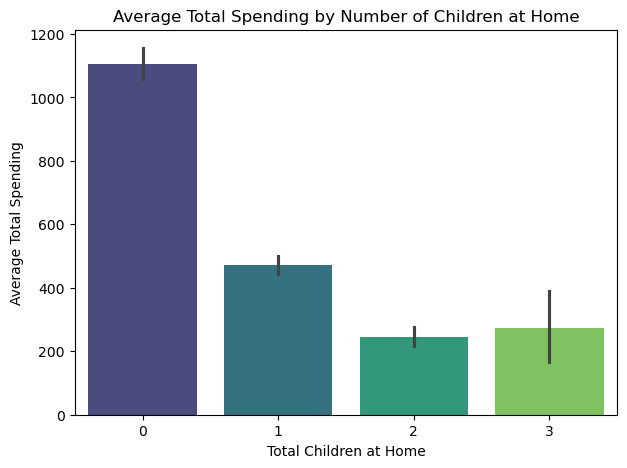

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='Total Children', y='Total_spending', data=df, estimator='mean', palette='viridis')
plt.title('Average Total Spending by Number of Children at Home')
plt.ylabel('Average Total Spending')
plt.xlabel('Total Children at Home')
plt.show()

In [227]:
corr = df['Total Children'].corr(df['Total_spending'])
print(f"Correlation: {corr:.3f}")

Correlation: -0.499


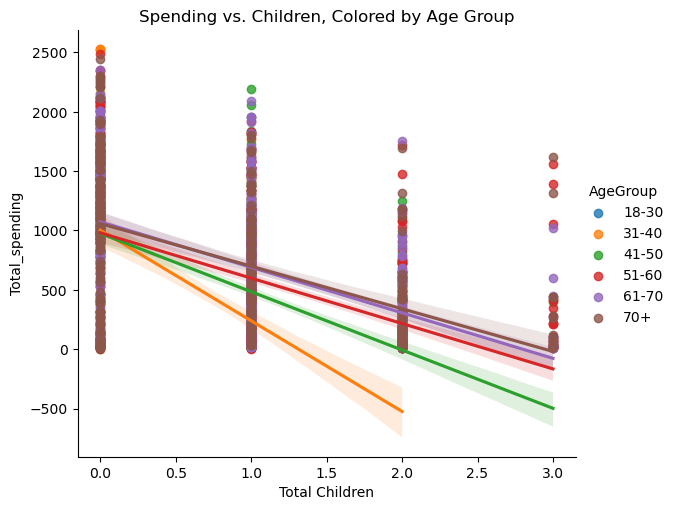

In [229]:
sns.lmplot(x='Total Children', y='Total_spending', hue='AgeGroup', data=df, markers='o', height=5, aspect=1.2)
plt.title('Spending vs. Children, Colored by Age Group')
plt.show()

### Conlusion - More children → Lower spending , No children → Higher total spending

In [232]:
complainers = df[df['Complain'] == 1]

In [234]:
education_complain = complainers['Education'].value_counts(normalize=True) * 100
print(education_complain)

Education
Graduation    66.666667
2N Cycle      19.047619
Master         9.523810
Phd            4.761905
Name: proportion, dtype: float64


C:\Users\singh\AppData\Local\Temp\ipykernel_11960\3546519631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=complainers, order=complainers['Education'].value_counts().index, palette='coolwarm')


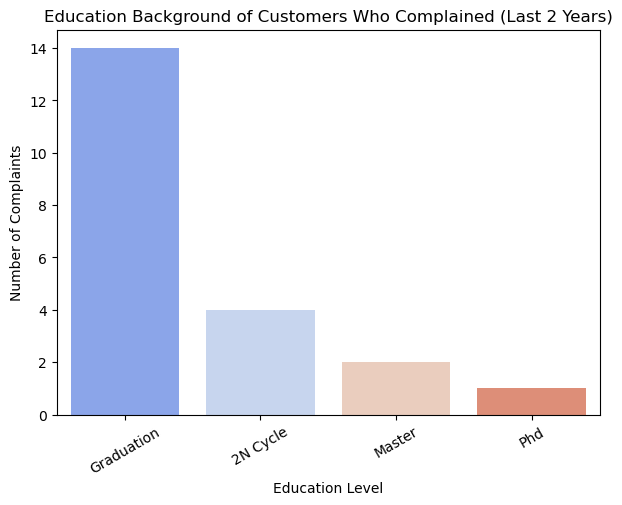

In [236]:
plt.figure(figsize=(7,5))
sns.countplot(x='Education', data=complainers, order=complainers['Education'].value_counts().index, palette='coolwarm')
plt.title('Education Background of Customers Who Complained (Last 2 Years)')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=30)
plt.show()

In [238]:
overall = df['Education'].value_counts(normalize=True) * 100
complainers = df[df['Complain'] == 1]['Education'].value_counts(normalize=True) * 100

comparison = pd.DataFrame({'Overall %': overall, 'Complained %': complainers}).fillna(0)
print(comparison)

            Overall %  Complained %
Education                          
2N Cycle     9.062500     19.047619
Basic        2.410714      0.000000
Graduation  50.312500     66.666667
Master      16.517857      9.523810
Phd         21.696429      4.761905


### Conclusion - 
1. Graduates - Largest number of complainers (most common education level)
2. Highly educated (PhD, Master) - Tend to complain more proportionally
3. Lower education levels - Fewer complaints overall